In [28]:
# Import the necessary Python libraries
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from math import log10
import math
from scipy.spatial.distance import pdist, squareform
from matplotlib.patches import Patch
import matplotlib.lines as mlines
from matplotlib import colors as mcolors
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
plt.rcParams['text.usetex'] = True

In [5]:
DATA_DIR = "DARS/"

In [6]:
# Reads the data of a single experiment
def read_datafile(name):
    fname = DATA_DIR + name + ".csv"
    print(fname)
    # Read data
    return pd.read_csv(fname, header=0, skiprows=6, engine='python')

In [59]:
df= read_datafile("S_Run2")
df1 =read_datafile("S_Run1")
df2 = read_datafile("S_Run3")

DARS/S_Run2.csv
DARS/S_Run1.csv
DARS/S_Run3.csv


In [47]:
obj_len = 0.48
obj_width = 0.38

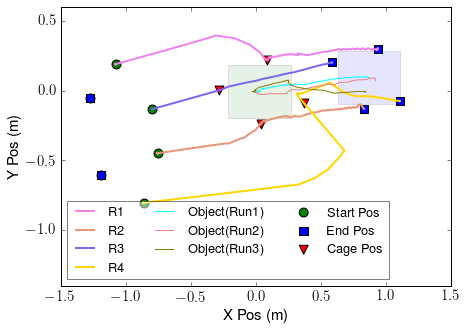

In [73]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)

colormap = plt.cm.gist_ncar #I suggest to use nipy_spectral, Set1,Paired
# ax.set_color_cycle([colormap(i) for i in np.linspace(0, 0.7,8)])
ccolors = ['Violet','DarkSalmon','MediumSlateBlue','gold','MidnightBlue','GreenYellow','Aqua', 'Teal']
markers = ['-','--','-.',':','.',',','o','v']
start_index = 1
inc = 2
cage_time = 11500
scat_x = []
scat_y = []
end_x = []
end_y = []
cage_x=[]
cage_y=[]
col_index = 0
obj_s = []
obj_e = []
for ind in range(0,7):
    if(col_index < 6):
        scat_x.append(df["X."+str(start_index)].iloc[0])
        scat_y.append(df["Z."+str(start_index)].iloc[0])
        end_x.append( df["X."+str(start_index)].iloc[len(df["X."+str(start_index)])-1])
        end_y.append( df["Z."+str(start_index)].iloc[len(df["X."+str(start_index)])-1])
        if(col_index != 4 and col_index != 5):
            cage_x.append(df["X."+str(start_index)].iloc[cage_time])
            cage_y.append(df["Z."+str(start_index)].iloc[cage_time])
        
    else:
        obj_s.append(df["X."+str(start_index)].iloc[cage_time])
        obj_s.append(df["Z."+str(start_index)].iloc[cage_time])
        obj_e.append(df["X."+str(start_index)].iloc[len(df["X."+str(start_index)])-1])
        obj_e.append(df["Z."+str(start_index)].iloc[len(df["X."+str(start_index)])-1])
    if(col_index < 6):
        if(col_index != 4 and col_index != 5):
            ax.plot(df["X."+str(start_index)],df["Z."+str(start_index)],label="R"+str(ind+1),c=ccolors[col_index],linewidth=2)
    
    else:
        ax.plot(df["X."+str(start_index)],df["Z."+str(start_index)],label="Object(Run1)",c=ccolors[col_index],linewidth=1)
        ax.plot(df1["X."+str(start_index)],df1["Z."+str(start_index)],label="Object(Run2)",c='lightcoral',linewidth=1)
        ax.plot(df2["X."+str(start_index)],df2["Z."+str(start_index)],label="Object(Run3)",c='olive',linewidth=1)
        
    col_index = col_index + 1
#     plt_df = df
#     ax.scatter(plt_df["X."+str(start_index)],plt_df["Z."+str(start_index)],label=None, s=3,c='r', zorder=10, edgecolors='r',marker='s')
    start_index = start_index + inc

ax.scatter(scat_x,scat_y,s=80,c='G',label="Start Pos",marker='o')
ax.scatter(end_x,end_y,s=80,c='B',label="End Pos",marker='s')
ax.scatter(cage_x,cage_y,s=80,c='R',label="Cage Pos",marker='v')

# add object 
patch = Rectangle((obj_s[0]-(obj_len/2), obj_s[1]-(obj_width/2)), obj_len, obj_width, fc='green', alpha=0.1)
ax.add_patch(patch)
patch = Rectangle((obj_e[0]-(obj_len/2), obj_e[1]-(obj_width/2)), obj_len, obj_width, fc='blue', alpha=0.1)
ax.add_patch(patch)
# ax.plot([], [], c=(1.0, 0.0, 0.0),label="LCA Active", linewidth=3)
ax.set_ylim( -1.4, 0.6)
plt.xlabel("X Pos (m)", fontsize=15)
plt.ylabel("Y Pos (m)", fontsize=15)
ax.legend(ncol=3,loc=3,framealpha=0.5,fontsize=13,scatterpoints=1)
plt.savefig("plots/Traj.pdf", dpi=600, format="pdf", transparent=False)

In [76]:
def dist(row,id1,id2):
    return math.hypot((row['X.'+str(id1)]-row['X.'+str(id2)]),(row['Z.'+str(id1)]-row['Z.'+str(id2)]))

In [87]:
dis_df = pd.DataFrame()
ids1=[1,3]
ids2=[5,7]
ind = 1
for ida in ids1:
    for idb in ids2:
        dis_df[['dis'+str(ind)+str(1)]] = df.apply(dist,id1=ida,id2=idb,axis = 1).apply(pd.Series)
        ind = ind +1
for ida in ids1:
    for idb in ids2:
        dis_df[['dis'+str(ind)+str(2)]] = df1.apply(dist,id1=ida,id2=idb,axis = 1).apply(pd.Series)
        ind = ind +1
for ida in ids1:
    for idb in ids2:
        dis_df[['dis'+str(ind)+str(3)]] = df2.apply(dist,id1=ida,id2=idb,axis = 1).apply(pd.Series)
        ind = ind +1

In [92]:
Time_factor = 7500

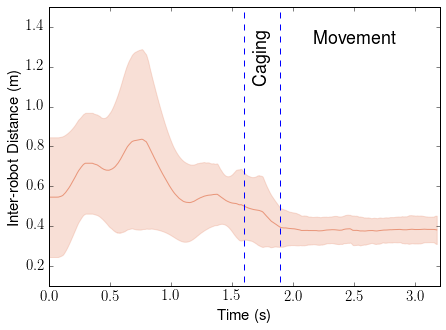

In [123]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
ax.plot(df['Frame']/Time_factor,dis_df.mean(axis=1),color=ccolors[1], label =None)
ax.fill_between(df['Frame']/Time_factor,dis_df.mean(axis=1)-dis_df.std(axis=1), dis_df.mean(axis=1)+dis_df.std(axis=1), color = ccolors[1], alpha = 0.3, label = None)
x, y = [1.6, 1.6], [0.0, 2]
x1,y1 = [1.89,1.89], [0.0, 2]
plt.plot(x, y, '--', marker = '', c='b')
plt.plot(x1, y1, '--', marker = '', c='b')
plt.figtext(0.53, 0.8, 'Caging', color='black', weight='roman', rotation=90,
        size=18)
plt.figtext(0.65, 0.8, 'Movement', color='black', weight='roman',
        size=18)
plt.xlabel("Time (s)", fontsize=15)
plt.ylabel("Inter-robot Distance (m)", fontsize=15)
ax.set_xlim( 0.0, 3.2)
ax.set_ylim( 0.1, 1.5)
plt.savefig("plots/I_dist.pdf", dpi=600, format="pdf", transparent=False)

In [127]:
%%bash
pdfcrop plots/Traj plots/Traj.pdf
pdfcrop plots/I_dist.pdf plots/I_dist.pdf

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `plots/Traj.pdf'.
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `plots/I_dist.pdf'.
